## Hindmarsh-Rose Neuron Model

### System of differential equations

$$\frac{dx}{dt} = y - ax^{3} + bx^{2} - z + i$$

$$\frac{dy}{dt} = c - dx^{2} - y$$

$$\frac{dz}{dt} = r(s(x - x_{1}) - z)$$

In [1]:
###Sys block
from warnings import simplefilter
simplefilter(action = 'ignore')
from random import seed
seed(120622)

###Lib block
import numpy as np
import sys
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sbn
from random import gauss
from IPython.display import HTML
from scipy.signal import find_peaks
import nolds
import torch

In [2]:
###Main block
#Modl params
a, b, c, d = 1, 3, 1, 5
r, s, x0, i_ = 0.001, 4, -1.6, 2

#Run controls
time, dt = 2000, 0.01
n = time / dt
t = np.arange(0 + dt, time, dt)

#Anti-bug run controls
if not len(t) == (n - 1):
    sys.exit(1)

#DAQ tensor instantiation
sVars = np.zeros((int(n), 3))

#Initialization
sVars[0] = np.array([0.5, 0.5, 0.5])

#Helper fxns (eqns)
def dfdt(sVars):
    #Unpack state vars
    x, y, z = sVars

    #Compute RHS of ODEs
    dxdt = y - a * (x ** 3) + b * (x ** 2) - z + i_
    dydt = c - d * (x ** 2) - y
    dzdt = r * (s * (x - x0) - z)

    #Fxn I.O
    return(np.array([dxdt, dydt, dzdt]))

#Integrate using forward-Euler formalism
for i,_ in enumerate(t):
    sVars[i + 1] = sVars[i] + dt * dfdt(sVars[i])
    
#Package vectors in nd heterogenous df
data = pd.DataFrame({'t': np.insert(t, 0, 0), 
                     'x': sVars[:, 0]}) \
         .query('t >= 1000 & t <= 1750') \
         .reset_index(drop = True) 

#I.O
data.head()

,t,x
0,1000.00,-1.532801
1,1000.01,-1.532784
2,1000.02,-1.532768
3,1000.03,-1.532751
4,1000.04,-1.532735


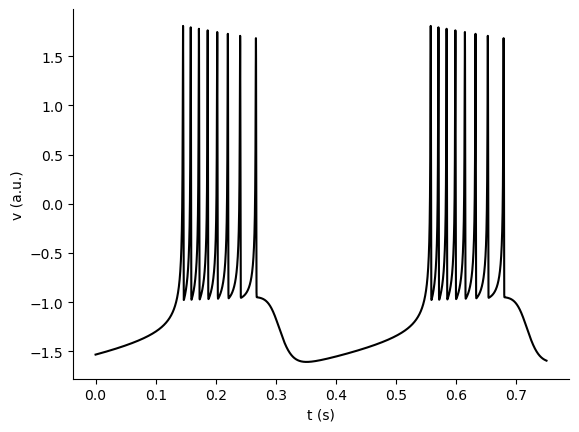

In [3]:
#Visualization
plt.figure()
plt.plot((data['t'] / 1000) - min(data['t'] / 1000), 
         data['x'],
         color = 'black')
sbn.despine()
plt.xlabel('t (s)')
plt.ylabel('v (a.u.)')
plt.show()

## Hindmarsh-Rose Model Compared to Biological Burster

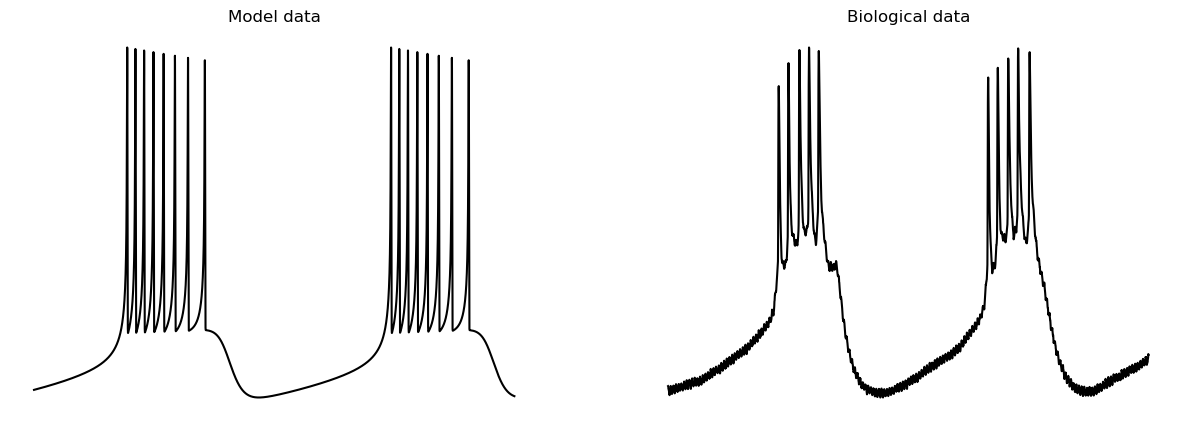

In [4]:
#Data dump
biolData = pd.read_csv('..\\data\\biologicalBurster.csv')

##Visualization
#Creation of graphics device
plt.figure(figsize = (15, 5))

#Creation of first panel (model data)
plt.subplot(121)
plt.plot(data['t'], 
         data['x'],
         color = 'black')
plt.title('Model data')
plt.axis('off')

#Creation of second panel (biological data)
plt.subplot(122)
plt.plot(biolData['t'], 
         biolData['v'],
         color = 'black')
plt.title('Biological data')
plt.axis('off')

#Render visualization to jupyter
plt.show()

## Hindmarsh-Rose Model With Noise Compared to Biological Burster

### Voltage-representing, state-variable equation with additive noise

$$\frac{dx}{dt} = y - ax^{3} + bx^{2} - z + w\xi + i$$

In [5]:
###Main block
#Modl params
a, b, c, d = 1, 3, 1, 5
r, s, x0, i_ = 0.001, 4, -1.6, 2
w = 1

#Run controls
time, dt = 2000, 0.01
n = time / dt
t = np.arange(0 + dt, time, dt)

#Anti-bug run controls
if not len(t) == (n - 1):
    sys.exit(1)

#DAQ tensor instantiation
sVars = np.zeros((int(n), 3))

#Initialization
sVars[0] = np.array([0.5, 0.5, 0.5])

#Helper fxns (eqns)
def dfdt(sVars):
    #Unpack state vars
    x, y, z = sVars

    #Compute RHS of ODEs
    dxdt = y - a * x ** 3 + b * x ** 2 - z + (w * gauss(mu = 0, sigma = 1)) + i_
    dydt = c - d * x ** 2 - y
    dzdt = r * (s * (x - x0) - z)

    #Fxn I.O
    return(np.array([dxdt, dydt, dzdt]))

#Integrate using forward-Euler formalism
for i,_ in enumerate(t):
    sVars[i + 1] = sVars[i] + dt * dfdt(sVars[i])
    
#Package vectors in nd heterogenous df
data = pd.DataFrame({'t': np.insert(t, 0, 0),
                     'x': sVars[:, 0]}) \
         .query('t >= 1000 & t <= 1750') \
         .reset_index(drop = True) 

#I.O
data.head()

,t,x
0,1000.00,-1.339023
1,1000.01,-1.320845
2,1000.02,-1.332076
3,1000.03,-1.321487
4,1000.04,-1.315268


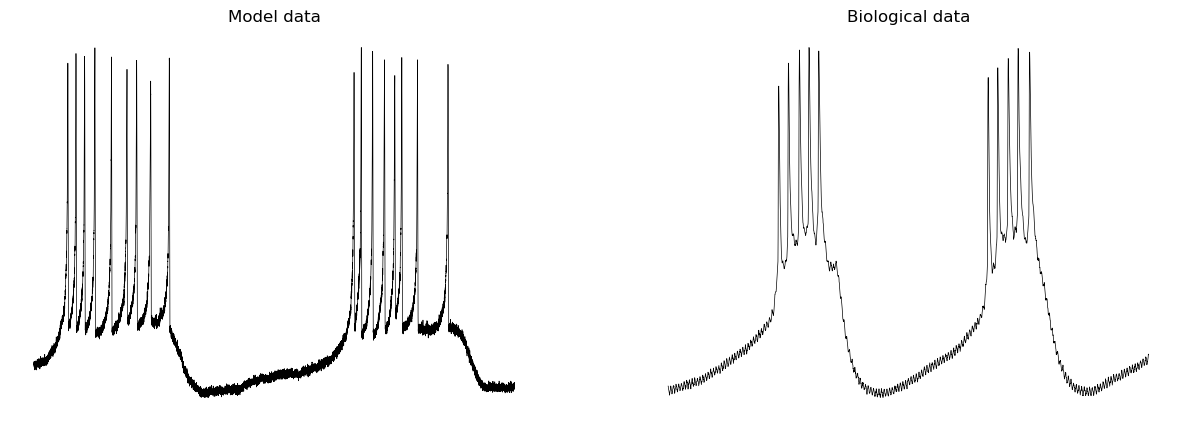

In [6]:
##Visualization
#Creation of graphics device
plt.figure(figsize = (15, 5))

#Creation of first panel (model data)
plt.subplot(121)
plt.plot(data['t'], 
         data['x'],
         linewidth = 0.5,
         color = 'black')
plt.title('Model data')
plt.axis('off')

#Creation of second panel (biological data)
plt.subplot(122)
plt.plot(biolData['t'], 
         biolData['v'],
         linewidth = 0.5,
         color = 'black')
plt.title('Biological data')
plt.axis('off')

#Draw visualization to jupyter
plt.show()

## Hindmarsh-Rose Model Parameterized to Produce Chaotic Activity

### Recapitulated system of differential equations

$$\frac{dx}{dt} = ay + bx^{2} - cx^{3}  - dz + ei$$

$$\frac{dy}{dt} = f - gx^{2} - y$$

$$\frac{dz}{dt} = (-z + hx + j) * k$$

In [7]:
###Main block
#Modl params
a, b, c, d, e = 4, 1.5, 0.25, 2, 2
f, g, h, j, k = 0.5, 0.625, 2, 6.4, 0.0021
i_ = 3.281

#Run controls
time, dt = 2500, 0.0025
n = time / dt
t = np.arange(0 + dt, time, dt)

#Anti-bug run controls
if not len(t) == (n - 1):
    sys.exit(1)

#DAQ tensor instantiation
sVars = np.zeros((int(n), 3))

#Initialization
sVars[0] = np.array([1, 1, 1])

#Helper fxns (eqns)
def dfdt(sVars):
    #Unpack state vars
    x, y, z = sVars

    #Compute RHS of ODEs
    dxdt = a * y + b * x ** 2 - c * x ** 3 - d * z + e * i_
    dydt = f - g * x ** 2 - y
    dzdt = (-z + h * x + j) * k

    #Fxn I.O
    return(np.array([dxdt, dydt, dzdt]))

#Integrate using rk45 formalism
for i,_ in enumerate(t):
    k1 = dfdt(sVars[i])
    k2 = dfdt(sVars[i] + (dt / 2) * k1)
    k3 = dfdt(sVars[i] + (dt / 2) * k2)
    k4 = dfdt(sVars[i] + dt * k3)
    sVars[i + 1] = sVars[i] + (dt / 6) * (k1 + 2 * (k2 + k3) + k4)
    
#Package vectors in nd heterogenous df
data = pd.DataFrame({'t': np.insert(t, 0, 0),
                     'x': sVars[:, 0]}) \
         .query('t >= 500 & t <= 2000') \
         .reset_index(drop = True) 

#I.O
data.head()

,t,x
0,500.0000,-1.977806
1,500.0025,-1.977825
2,500.0050,-1.977844
3,500.0075,-1.977863
4,500.0100,-1.977882


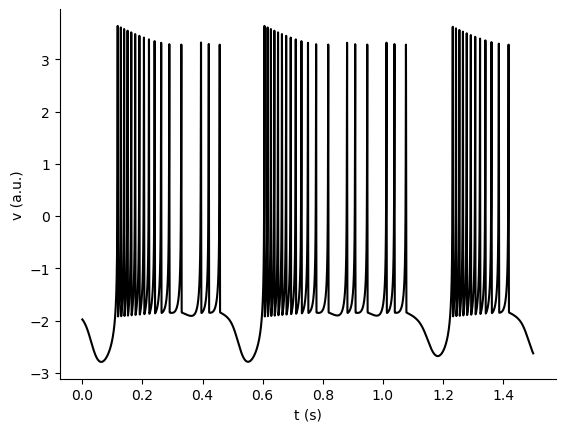

In [8]:
#Visualization
plt.figure()
plt.plot((data['t'] / 1000) - min(data['t'] / 1000), 
         data['x'],
         color = 'black')
sbn.despine()
plt.xlabel('t (s)')
plt.ylabel('v (a.u.)')
plt.show()

## Development of feature-extraction algorithm (specifically for biological data)

### 1. Ingest biological data from which features will be extracted

In [9]:
#Ingest data using pandas
biolData = pd.read_csv('..\\data\\ergodicData.csv')

#I.O
biolData.head()

,t,v
0,0.000,-66.501
1,0.001,-66.367
2,0.002,-66.373
3,0.003,-66.415
4,0.004,-66.496


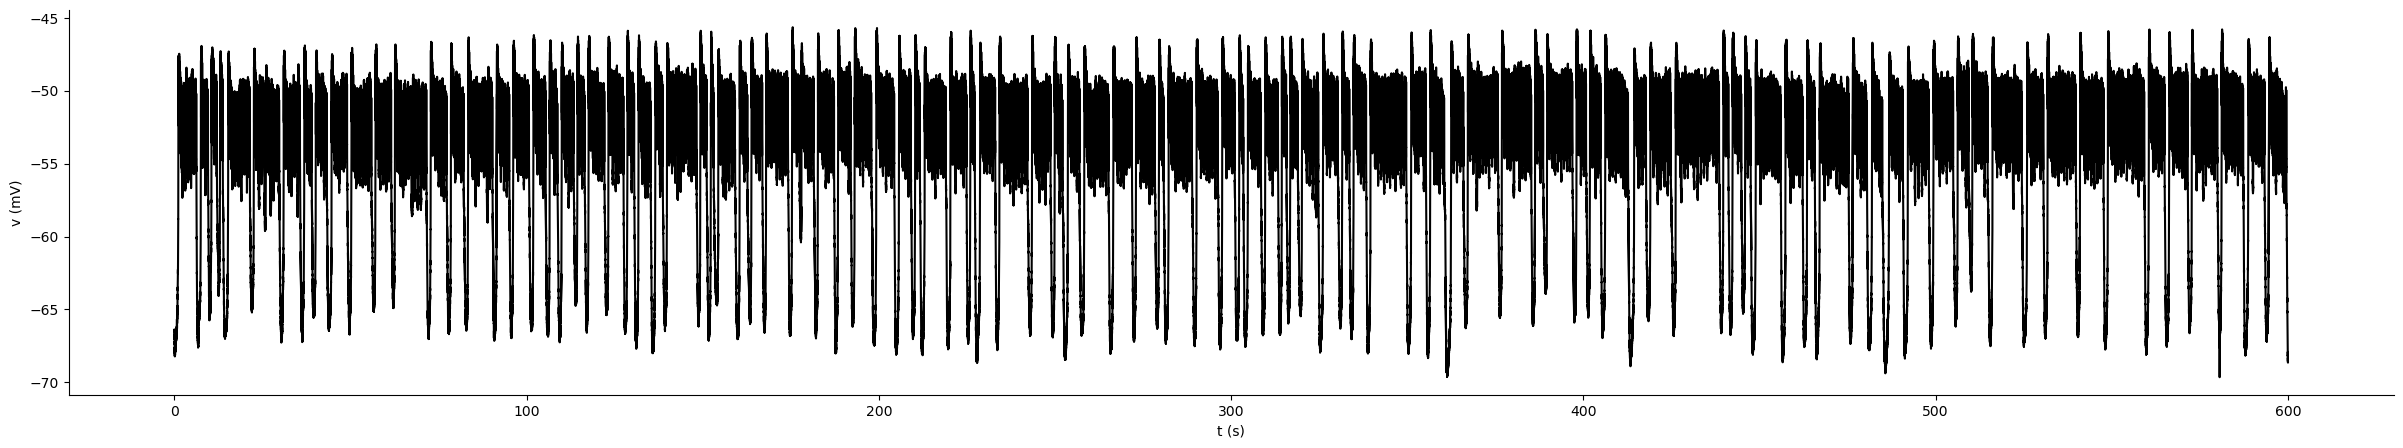

In [10]:
#Visualization
plt.figure(figsize = (30, 5))
plt.plot(biolData['t'], 
         biolData['v'],
         color = 'black')
sbn.despine()
plt.xlabel('t (s)')
plt.ylabel('v (mV)')
plt.show()

### 2. Find local maxima of voltage data, detect spikes

In [11]:
##Spike detection via threshold crossings
#Approximate local maximum (i.e., peaks)
peaks,_ = find_peaks(x = biolData['v'], 
                     threshold = -55, 
                     prominence = 2.5)

#Spike detection
spikes = biolData.loc[biolData \
                 .index \
                 .isin(peaks),] \
                 .reset_index(drop = True)

#I.O
spikes

,t,v
0,1.172,-48.428
1,1.204,-47.890
2,1.238,-47.574
3,1.273,-47.629
4,1.309,-47.766
...,...,...
6415,599.107,-50.616
6416,599.221,-50.339
6417,599.335,-50.500
6418,599.426,-49.759


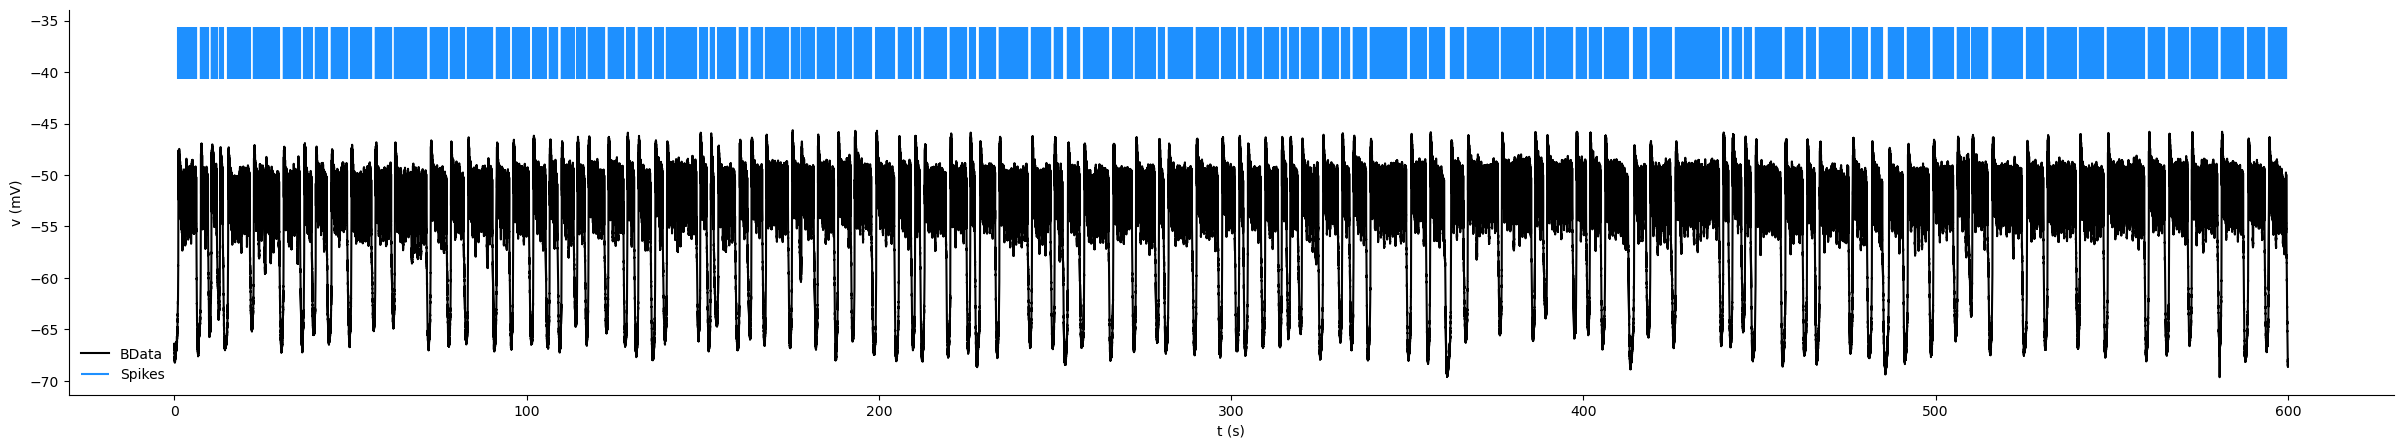

In [12]:
##Visualization
#Creation of graphics device
plt.figure(figsize = (30, 5))

#Plot biologica/model data
plt.plot(biolData['t'], 
         biolData['v'],
         color = 'black',
         label = 'BData')

#Plot binary spike train
plt.vlines(spikes['t'], 
           biolData['v'].max() + 5, 
           biolData['v'].max() + 10, 
           color = 'dodgerblue',
           label = 'Spikes')

#Alter plot attributes
sbn.despine()
plt.xlabel('t (s)')
plt.ylabel('v (mV)')

##Build legend
#Standard legend with mappable 'labels'
plt.legend(frameon = False,
           loc = 'lower left')

#Draw visualization to jupyter
plt.show()

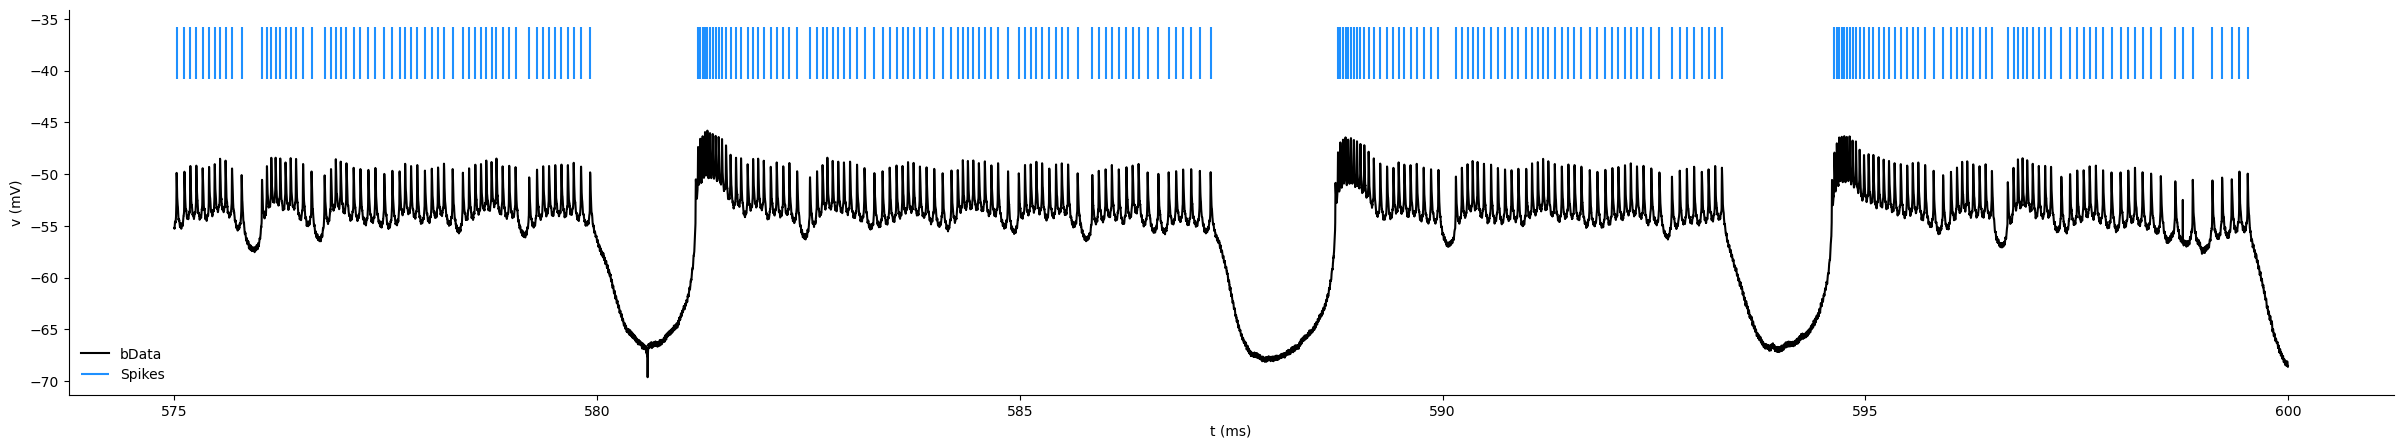

In [13]:
##Wrangle data
#Model data
data_ = biolData.query('t >= 575') \
                .reset_index(drop = True)

#Binary spike train data
spikes_ = spikes.query('t >= 575') \
                .reset_index(drop = True)

##Visualization
#Creation of graphics device
plt.figure(figsize = (30, 5))

#Plot biologica/model data
plt.plot(data_['t'], 
         data_['v'],
         color = 'black',
         label = 'bData')

#Plot binary spike train
plt.vlines(spikes_['t'], 
           data_['v'].max() + 5, 
           data_['v'].max() + 10, 
           color = 'dodgerblue',
           label = 'Spikes')

#Alter plot attributes
sbn.despine()
plt.xlabel('t (ms)')
plt.ylabel('v (mV)')

##Build legend
#Standard legend with mappable 'labels'
plt.legend(frameon = False,
           loc = 'lower left')

#Draw visualization to jupyter
plt.show()

### 3. Compute features: ISI, IBI, spike frequency, Lyaponov exponent

In [14]:
##Simple differentiation of binary spike train across time
#Compute difference between spikes
dataDiff = np.diff(spikes['t'])

#Convert to pandas vector
dataDiff = pd.Series(dataDiff)
dataDiff

0       0.032
1       0.034
2       0.035
3       0.036
4       0.038
        ...  
6414    0.233
6415    0.114
6416    0.114
6417    0.091
6418    0.098
Length: 6419, dtype: float64

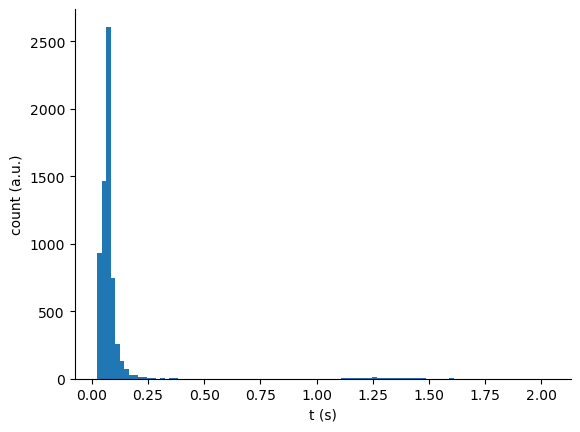

In [15]:
#Visualization
plt.figure()
plt.hist(dataDiff,
         bins = 100)
sbn.despine()
plt.xlabel('t (s)')
plt.ylabel('count (a.u.)')
plt.show()

In [16]:
##Subset ISI
#Conditionally subset with 5*sigma rule
dataISI = dataDiff.loc[(dataDiff < (dataDiff.std() * 5))] \
                  .reset_index(drop = True)

##Subset IBI
dataIBI = dataDiff.loc[(dataDiff > (dataDiff.std() * 5))] \
                  .reset_index(drop = True)

In [17]:
#Extract x, y data from hist
yISI, xISI, _ = plt.hist(dataISI,
                         bins = 100)

#Negate rendering of visualization
plt.close()

##Identify time interval with max count for ISI
#I.O
ISI = xISI[yISI.argmax()]
ISI

0.0676999999999802

In [18]:
#Extract x, y data from hist
yIBI, xIBI, _ = plt.hist(dataIBI,
                         bins = 100)

#Negate rendering of visualization
plt.close()

##Identify time interval with max count for IBI
#I.O
IBI = xIBI[yIBI.argmax()]
IBI

1.2475799999999926

In [19]:
##Determination of spike frequency per epoch
#Calculate spike frequency
spikeFreq = spikes['t'].count() / spikes['t'].max()

#I.O
spikeFreq

10.70849540635571

In [ ]:
# ###Capture N number of epochs
# ##600 s / 30 s = 20 epochs
# #Param instantiations for epoch identifications
# initialTime = 0
# timeWindow = 30
# epochs = (max(biolData['t']) - 1) / timeWindow

# #Instantiate DAQ list-column
# epochs_ = []

# #Initialize iterator
# i = 0

# #Capture time-series epochs for ergodic computation of ;yap expo
# while i <= epochs:
#     #Append epoch to DAQ list-column
#     epochs_.append(biolData.query(f't > {initialTime} & t <= {timeWindow}') \
#                            .reset_index(drop = True))

#     #Update params
#     initialTime = timeWindow
#     timeWindow += 30

#     #Increase iterator
#     i += 1

# #DAQ list
# dataLyap = []

# #Determination of lyap expo
# for i,_ in enumerate(epochs_):
#     #Compute largest Lyap expo per epoch
#     dataLyap.append(nolds.lyap_r(epochs_[i]['v']))

# #I.O
# lyapExpo = sum(dataLyap) / len(dataLyap)
# lyapExpo

In [53]:
#Capture optimization targets in intuitive data structure
optoData = pd.DataFrame({'ISI (s)': [ISI],
                         'IBI (s)': [IBI],
                         'Spike Frequency (spikes/s)': [spikeFreq]})

#Alter df attributes
optoData = optoData.style \
                   .set_table_styles([dict(selector = 'th', 
                                           props = [('text-align', 'center')])]) \
                   .set_properties(**{'text-align': 'center'}) \
                   .hide_index()

#I.O
optoData

ISI (s),IBI (s),Spike Frequency (spikes/s)
0.010405,0.147739,26.660608


In [54]:
#Convert to torch tensor
optoData = torch.as_tensor([ISI, IBI, spikeFreq])

#I.O
optoData

tensor([1.0405e-02, 1.4774e-01, 2.6661e+01], dtype=torch.float64)

## Testing feature-extraction algorithm steps on model data

### Functionalize Hindmarsh-Rose model

In [23]:
###Fxn block
def hrModl(a = 4, b = 1.5, c = 0.25, d = 2, e = 2,
           f = 0.5, g = 0.625, h = 2, j = 6.4, k = 0.0021,
           i_ = 3.281):
    '''
    
    Fxnalized Hindmarsh-Rose modl object
    
    - #Modl param chunk has not been recapitulated as fxn args
        * args locally scoped to function, but serve as global params to subsequent nested fxn(s)
        * pargs/kwargs are dargs (default args)
    
    '''
    
    #Run controls
    time, dt = 6000, 0.0025
    n = time / dt
    t = np.arange(0 + dt, time, dt)
    
    #DAQ tensor instantiation
    sVars = np.zeros((int(n), 3))
    
    #Initialization
    sVars[0] = np.array([1, 1, 1])
    
    #Helper fxns (eqns)
    def dfdt(sVars):
        #Unpack state vars
        x, y, z = sVars
    
        #Compute RHS of ODEs
        dxdt = a * y + b * x ** 2 - c * x ** 3 - d * z + e * i_
        dydt = f - g * x ** 2 - y
        dzdt = (-z + h * x + j) * k
    
        #Fxn I.O
        return(np.array([dxdt, dydt, dzdt]))
    
    #Integrate using rk45 formalism
    for i,_ in enumerate(t):
        k1 = dfdt(sVars[i])
        k2 = dfdt(sVars[i] + (dt / 2) * k1)
        k3 = dfdt(sVars[i] + (dt / 2) * k2)
        k4 = dfdt(sVars[i] + dt * k3)
        sVars[i + 1] = sVars[i] + (dt / 6) * (k1 + 2 * (k2 + k3) + k4)
        
    #Package vectors in nd heterogenous df
    data = pd.DataFrame({'t': np.insert(t, 0, 0),
                         'x': sVars[:, 0]}) \
             .query(f't >= 1000 & t <= {time}') \
             .assign(t = lambda x: x['t'] / 1000) \
             .reset_index(drop = True) 
    
    #I.O
    return(data)

### 1. Ingest model data from which features will be extracted

In [24]:
#Ingest data using pandas
data = hrModl()

#I.O
data.head()

,t,x
0,1.000000,-2.097085
1,1.000003,-2.097118
2,1.000005,-2.097150
3,1.000008,-2.097183
4,1.000010,-2.097216


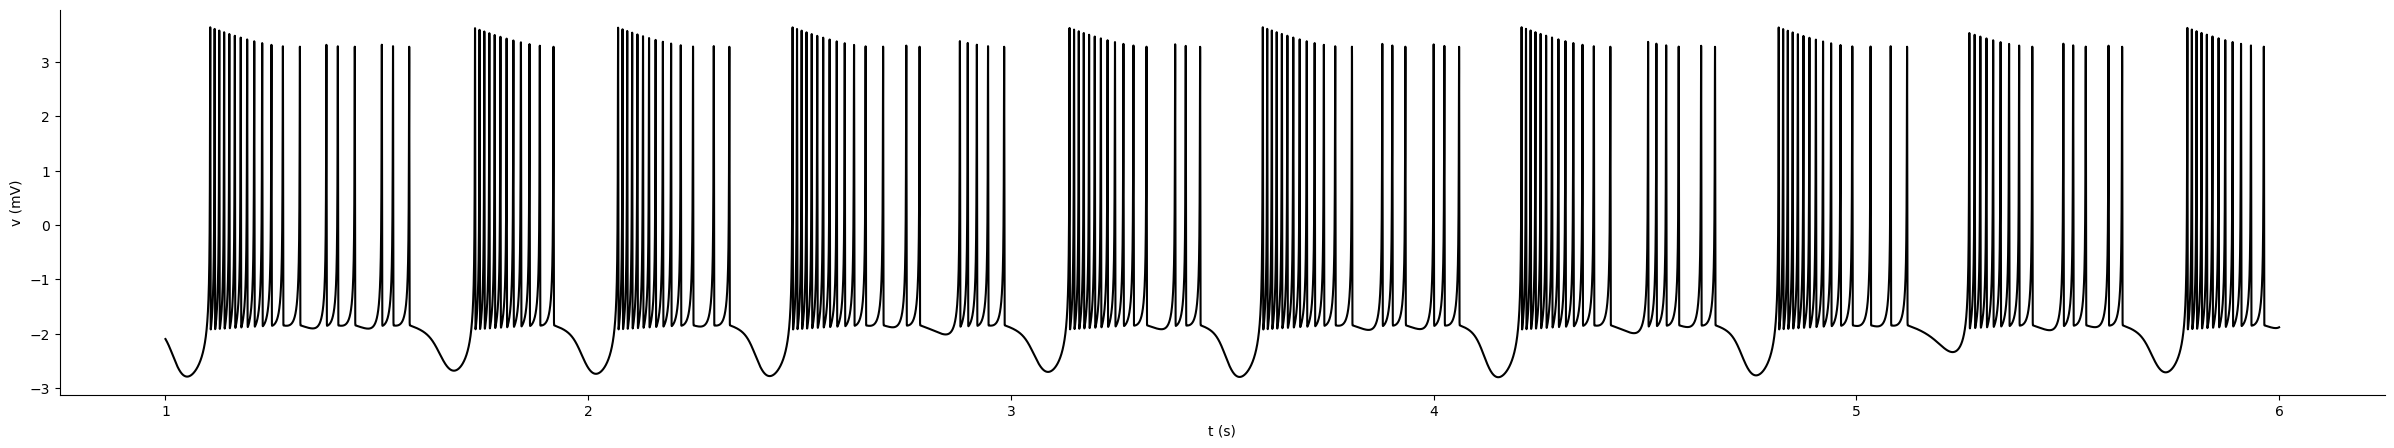

In [25]:
#Visualization
plt.figure(figsize = (30, 5))
plt.plot(data['t'], 
         data['x'],
         color = 'black')
sbn.despine()
plt.xlabel('t (s)')
plt.ylabel('v (mV)')
plt.show()

### 2. Find local maxima of voltage data, detect spikes

In [39]:
##Spike detection via threshold crossings
#Approximate local maximum (i.e., peaks)
peaks,_ = find_peaks(x = data['x'], 
                     threshold = 0, 
                     prominence = 2.5)

#Spike detection
spikes = data.loc[data \
             .index \
             .isin(peaks),] \
             .reset_index(drop = True)

#I.O
spikes

,t,x
0,1.105913,3.639657
1,1.116343,3.610028
2,1.127290,3.579597
3,1.138828,3.548381
4,1.151053,3.516377
...,...,...
154,5.872645,3.403084
155,5.890103,3.369045
156,5.909937,3.335877
157,5.933438,3.305458


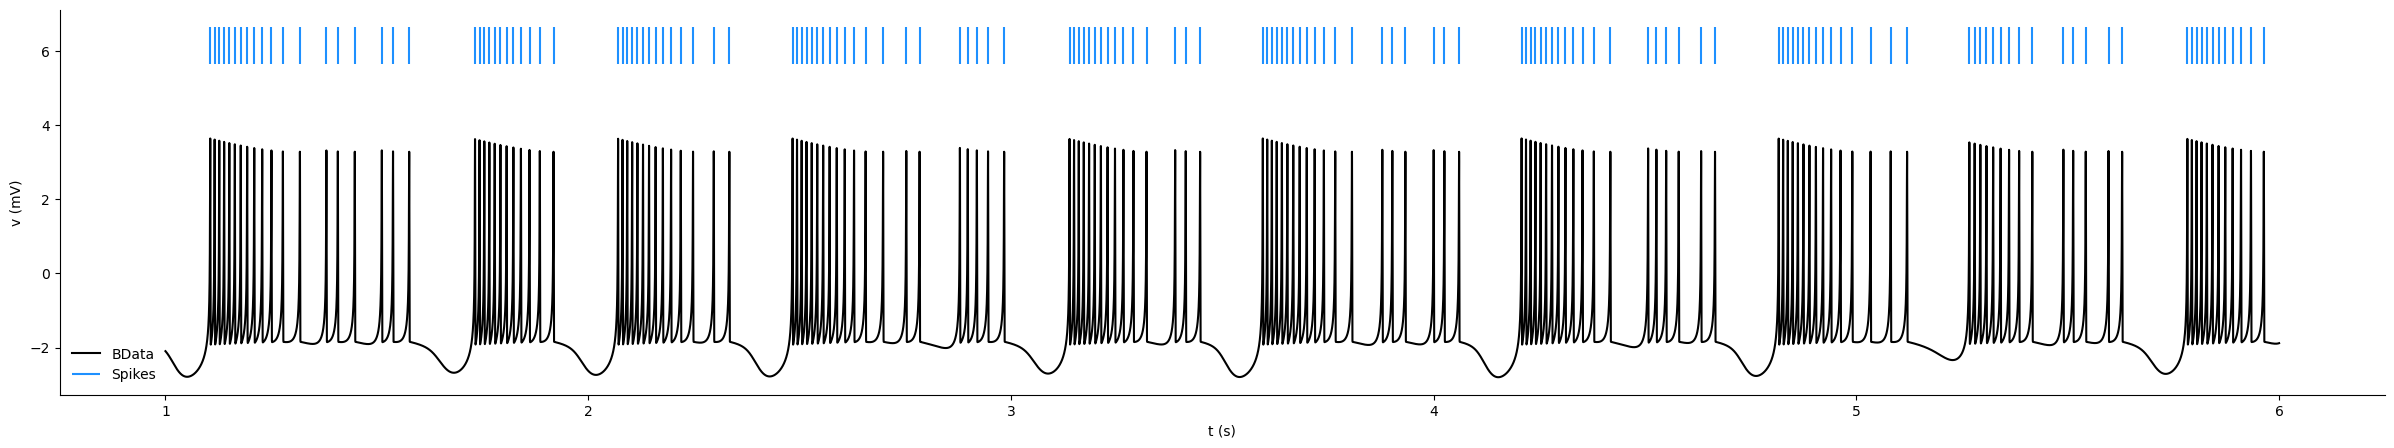

In [40]:
##Visualization
#Creation of graphics device
plt.figure(figsize = (30, 5))

#Plot biologica/model data
plt.plot(data['t'], 
         data['x'],
         color = 'black',
         label = 'BData')

#Plot binary spike train
plt.vlines(spikes['t'], 
           data['x'].max() + 2, 
           data['x'].max() + 3, 
           color = 'dodgerblue',
           label = 'Spikes')

#Alter plot attributes
sbn.despine()
plt.xlabel('t (s)')
plt.ylabel('v (mV)')

##Build legend
#Standard legend with mappable 'labels'
plt.legend(frameon = False,
           loc = 'lower left')

#Draw visualization to jupyter
plt.show()

### 3. Compute features: ISI, IBI, spike frequency, Lyaponov exponent

In [41]:
##Simple differentiation of binary spike train across time
#Compute difference between spikes
dataDiff = np.diff(spikes['t'])

#Convert to pandas vector
dataDiff = pd.Series(dataDiff)
dataDiff

0      0.010430
1      0.010948
2      0.011537
3      0.012225
4      0.013033
         ...   
153    0.015745
154    0.017458
155    0.019835
156    0.023500
157    0.030417
Length: 158, dtype: float64

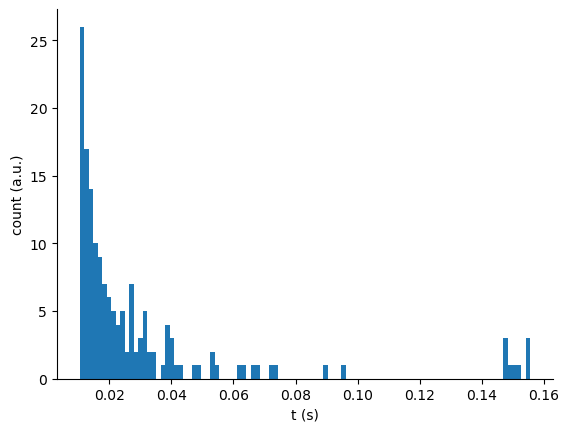

In [42]:
#Visualization
plt.figure()
plt.hist(dataDiff,
         bins = 100)
sbn.despine()
plt.xlabel('t (s)')
plt.ylabel('count (a.u.)')
plt.show()

In [43]:
##Subset ISI
#Conditionally subset with 5*sigma rule
dataISI = dataDiff.loc[(dataDiff < (dataDiff.std() * 2.5))] \
                  .reset_index(drop = True)

##Subset IBI
dataIBI = dataDiff.loc[(dataDiff > (dataDiff.std() * 2.5))] \
                  .reset_index(drop = True)

In [44]:
#Extract x, y data from hist
yISI, xISI, _ = plt.hist(dataISI,
                         bins = 100)

#Negate rendering of visualization
plt.close()

##Identify time interval with max count for ISI
#I.O
ISI = xISI[yISI.argmax()]
ISI

0.010404999999999553

In [45]:
#Extract x, y data from hist
yIBI, xIBI, _ = plt.hist(dataIBI,
                         bins = 100)

#Negate rendering of visualization
plt.close()

##Identify time interval with max count for IBI
#I.O
IBI = xIBI[yIBI.argmax()]
IBI

0.1477385999999998

In [46]:
##Determination of spike frequency per epoch
#Calculate spike frequency
spikeFreq = spikes['t'].count() / spikes['t'].max()

#I.O
spikeFreq

26.660607945699553

In [47]:
# #Determination of lyap expo
# lyapExpo = nolds.lyap_r(data['x'])

# #I.O
# lyapExpo

In [48]:
#Capture optimization targets in intuitive data structure
modlFts = pd.DataFrame({'ISI (s)': [ISI],
                        'IBI (s)': [IBI],
                        'Spike Frequency (spikes/s)': [spikeFreq]})

#Alter df attributes
modlFts = modlFts.style \
                 .set_table_styles([dict(selector = 'th', 
                                         props = [('text-align', 'center')])]) \
                 .set_properties(**{'text-align': 'center'}) \
                 .hide_index()

#I.O
modlFts

ISI (s),IBI (s),Spike Frequency (spikes/s)
0.010405,0.147739,26.660608


In [49]:
#Convert to torch tensor
modlFts = torch.as_tensor([ISI, IBI, spikeFreq])

#I.O
modlFts

tensor([1.0405e-02, 1.4774e-01, 2.6661e+01], dtype=torch.float64)

### Functionalize feature-extraction algorithm for model data

In [50]:
###Fxn block
def featureExtraction(df):
    '''

    Fxnalized feature-extraction algorithm to compute ISI, IBI, spike frequency, and Lyaponov exponent
    
    - Fxn arg df is for passing of simulated data as df
    
    '''

    ############################## DATA INGESTION ##############################

    #Ingest data using pandas
    data = df

    ############################## SPIKE DETECTION ##############################

    ##Spike detection via threshold crossings
    #Approximate local maximum (i.e., peaks)
    peaks,_ = find_peaks(x = data['x'], 
                         threshold = 0, 
                         prominence = 4)
    
    #Spike detection
    spikes = data.loc[data \
                 .index \
                 .isin(peaks),] \
                 .reset_index(drop = True)

    ############################## SIMPLE DIFFERENTIATION FOR INTERVAL DETERMINATION ##############################

    ##Simple differentiation of binary spike train across time
    #Compute difference between spikes
    dataDiff = np.diff(spikes['t'])
    
    #Convert to pandas vector
    dataDiff = pd.Series(dataDiff)

    ############################## COMPUTATION FOR ISI FEATURE ##############################

    ##Subset ISI
    #Conditionally subset with 5*sigma rule
    dataISI = dataDiff.loc[(dataDiff < (dataDiff.std() * 2.5))] \
                      .reset_index(drop = True)

    #Extract x, y data from hist
    yISI, xISI, _ = plt.hist(dataISI,
                             bins = 100)
    
    #Negate rendering of visualization
    plt.close()
    
    ##Identify time interval with max count for ISI
    #I.O
    ISI = xISI[yISI.argmax()]

    ############################## COMPUTATION FOR IBI FEATURE ##############################
    
    ##Subset IBI
    #Conditionally subset with 5*sigma rule
    dataIBI = dataDiff.loc[(dataDiff > (dataDiff.std() * 2.5))] \
                      .reset_index(drop = True)

    #Extract x, y data from hist
    yIBI, xIBI, _ = plt.hist(dataIBI,
                             bins = 100)
    
    #Negate rendering of visualization
    plt.close()
    
    ##Identify time interval with max count for IBI
    #I.O
    IBI = xIBI[yIBI.argmax()]

    ############################## COMPUTATION FOR SPIKE FREQUENCY FEATURE ##############################

    ##Determination of spike frequency per epoch
    #Calculate spike frequency
    spikeFreq = spikes['t'].count() / spikes['t'].max()

    ############################## COMPUTATION FOR LYAP EXPO FEATURE ##############################
    
    # #Determination of lyap expo
    # lyapExpo = nolds.lyap_r(data['x'])

    ############################## PACKAGE FEATURES INTO LIST AND RETURN ##############################

    # #Capture optimization targets in intuitive data structure
    # optoData = pd.DataFrame({'ISI (s)': [ISI],
    #                          'IBI (s)': [IBI],
    #                          'Spike Frequency (spikes/s)': [spikeFreq],
    #                          'Lyaponov Exponent (a.u.)': [lyapExpo]})
    
    # #Alter df attributes
    # optoData = optoData.style \
    #                    .set_table_styles([dict(selector = 'th', 
    #                                            props = [('text-align', 'center')])]) \
    #                    .set_properties(**{'text-align': 'center'}) \
    #                    .hide_index()

    #Capture optimization targets in intuitive data structure
    modlFts = [ISI, IBI, spikeFreq]
    
    #I.O
    return(modlFts)

def simulate(a = 4, b = 1.5, c = 0.25, d = 2, e = 2,
             f = 0.5, g = 0.625, h = 2, j = 6.4, k = 0.0021,
             i_ = 3.281):
    '''

    Wrapper function, which simulates hrModl() and computes and returns fts of interest
    
    '''
    #Simulate modl
    modl = hrModl(a, b, c, d, e,
                  f, g, h, j, k,
                  i_)

    #Compute features
    fts = torch.as_tensor(featureExtraction(modl))

    #I.O
    return(fts)

### Test feature-extraction algorithm on model data

In [52]:
%%time

#Call wrapper function utilizing default args
simulate()

Wall time: 50.2 s


tensor([1.0405e-02, 1.4774e-01, 2.6661e+01], dtype=torch.float64)